In [24]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors

%matplotlib inline

from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter



In [25]:
#Loading the dataset
df=pd.read_csv('HR_capstone_dataset.csv')

In [26]:
#Displaying first few rows of the dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [27]:
#Checking each column dtpye and non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [28]:
#Descriptive statistics of the data set
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [29]:
df.shape

(14999, 10)

In [30]:
df.size

149990

In [31]:
#Cleaning column names
df.columns=df.columns.str.lower()
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [32]:
#Checking null values
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [33]:
#Checking duplicated values
df[df.duplicated()].sort_values(by=['satisfaction_level','last_evaluation','number_project','average_montly_hours']).head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
12278,0.09,0.78,6,254,4,0,1,0,support,low
14489,0.09,0.78,6,254,4,0,1,0,support,low
12477,0.09,0.79,6,275,4,0,1,0,sales,low
14688,0.09,0.79,6,275,4,0,1,0,sales,low


In [155]:
#Removing duplicate values
df.drop_duplicates(inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
print('The shape of the df after removing duplicated is:',df.shape)
print('The size of the df after removing duplicated is:',df.size)

The shape of the df after removing duplicated is: (11991, 10)
The size of the df after removing duplicated is: 119910


In [229]:
#Determining number of rows containing outliers in column 'time_spend_company'

#computing 25 percentile and 75 percentile
Q1=df['time_spend_company'].quantile(0.25)
Q3=df['time_spend_company'].quantile(0.75)

#Computing inter quartile range(IQR)
IQR=Q3-Q1

#Computing upper limit and lower limit
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

#Filtering  rows with outliers
no_of_outliers_time_spend_company=df[(df['time_spend_company']>upper_limit) | (df['time_spend_company']<lower_limit)]

#Computing number of rows with outlier data
print('The number of rows with outlier is:',len(no_of_outliers_time_spend_company))

The number of rows with outlier is: 824


In [239]:
#Calculating percentage of outlier data
percentage_outlier=len(no_of_outliers_time_spend_company)/df['time_spend_company'].shape[0]*100
print(f"{percentage_outlier:.2f}% of total rows is outlier for column time_spend_company.")

6.87% of total rows is outlier for column time_spend_company.


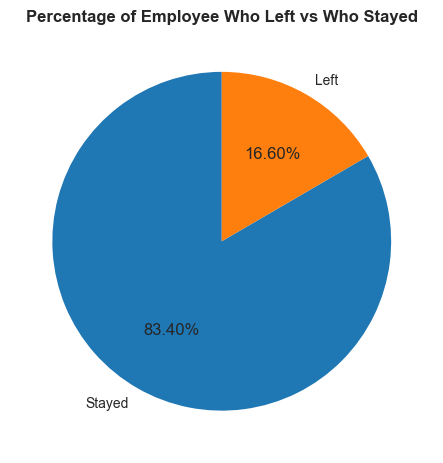

In [96]:
#Checking number of people who left vs who stayed
count_left=df['left'].value_counts()
plt.figure()
count_left.plot(kind='pie',colors=mcolors.TABLEAU_COLORS,startangle=90,autopct='%.2f%%',labels=['Stayed','Left'])
plt.title('Percentage of Employee Who Left vs Who Stayed',fontweight='bold',fontsize=12)
plt.ylabel('')
plt.show()


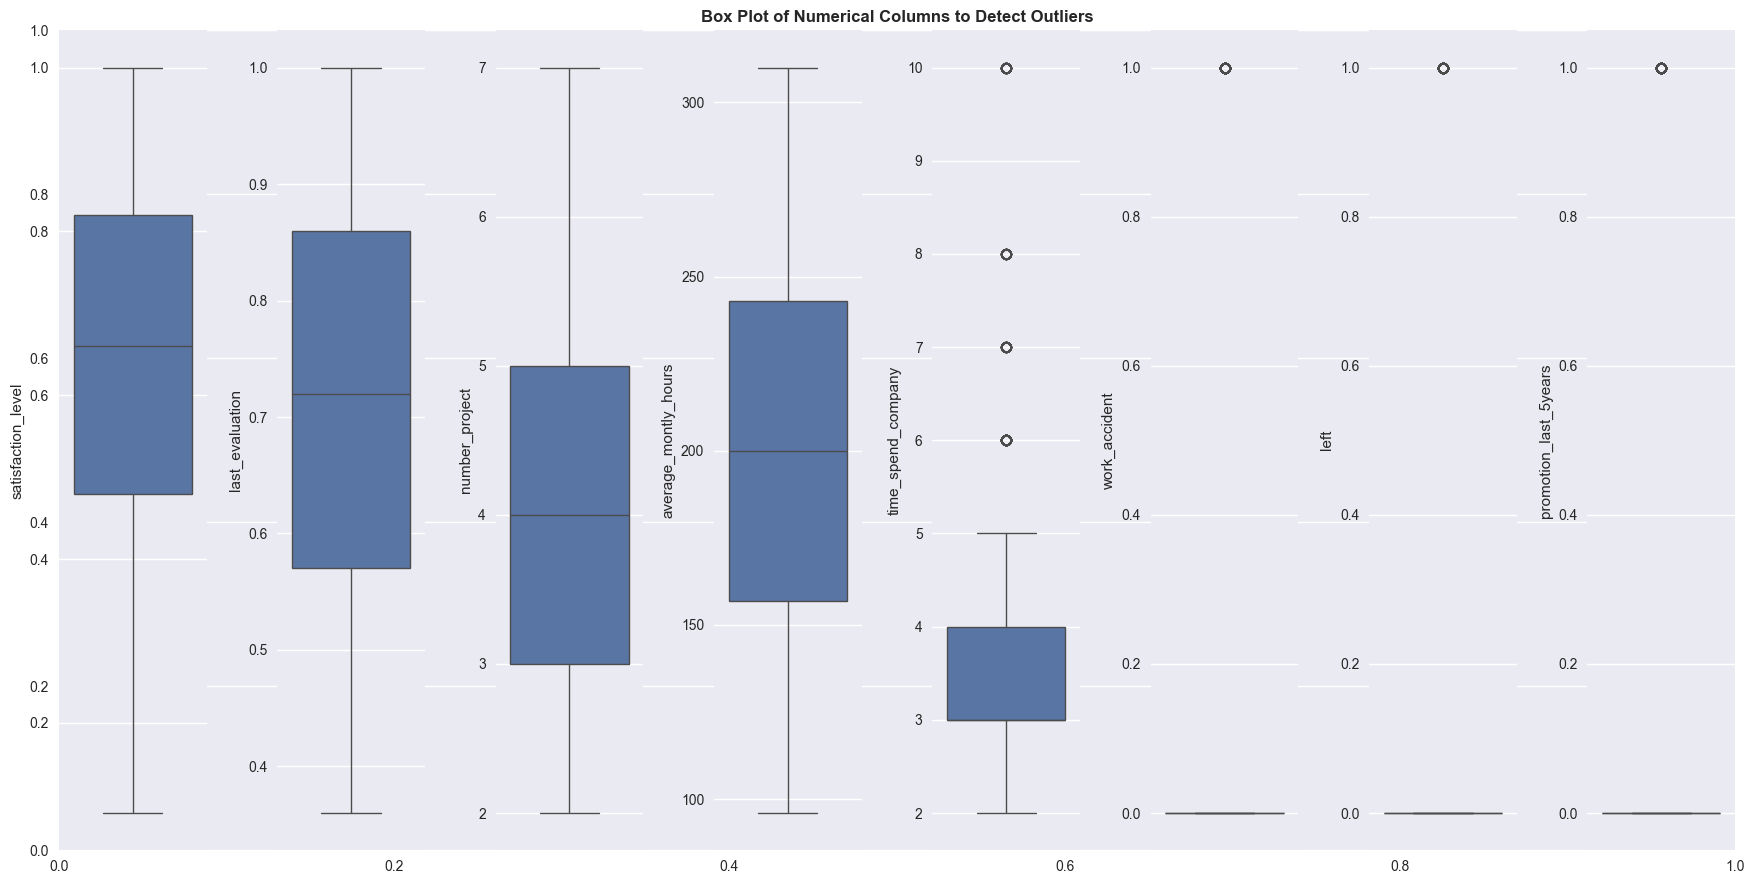

In [196]:
#Selecting numerical columns only
numerical_columns=df.select_dtypes(include=('int64','float64')).columns

#Ploting box plot for each numerical columns
plt.figure(figsize=(18,9))
plt.title('Box Plot of Numerical Columns to Detect Outliers',fontweight='bold')
for i,col in enumerate(numerical_columns):
    plt.subplot(1,len(numerical_columns),i+1)
    sns.boxplot(df[col])
    plt.tight_layout()

plt.show()

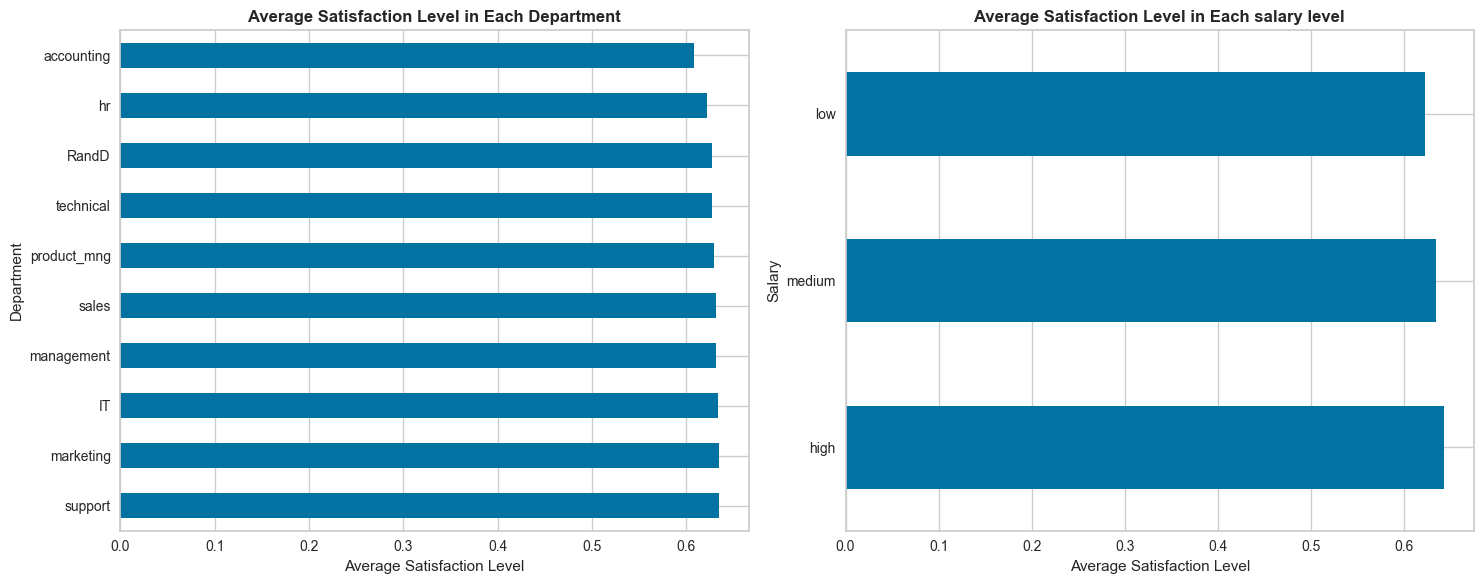

In [125]:
#Checking average satisfaction level at each department
satisfaction_department=df.groupby('department')['satisfaction_level'].mean().sort_values(ascending=False)

#Checking average satisfaction level at salary level
satisfaction_salary=df.groupby('salary')['satisfaction_level'].mean().sort_values(ascending=False)

#Ploting average satisfaction level at each department in bar graph
fig,ax=plt.subplots(1,2,figsize=(15,6))
satisfaction_department.plot(kind='barh',ax=ax[0])
ax[0].set_ylabel('Department')
ax[0].set_xlabel('Average Satisfaction Level')
ax[0].set_title('Average Satisfaction Level in Each Department',fontweight='bold')

#Ploting average satisfaction level at each salary level in bar graph
satisfaction_salary.plot(kind='barh',ax=ax[1])
ax[1].set_ylabel('Salary')
ax[1].set_xlabel('Average Satisfaction Level')
ax[1].set_title('Average Satisfaction Level in Each salary level',fontweight='bold')

plt.tight_layout()
plt.show()

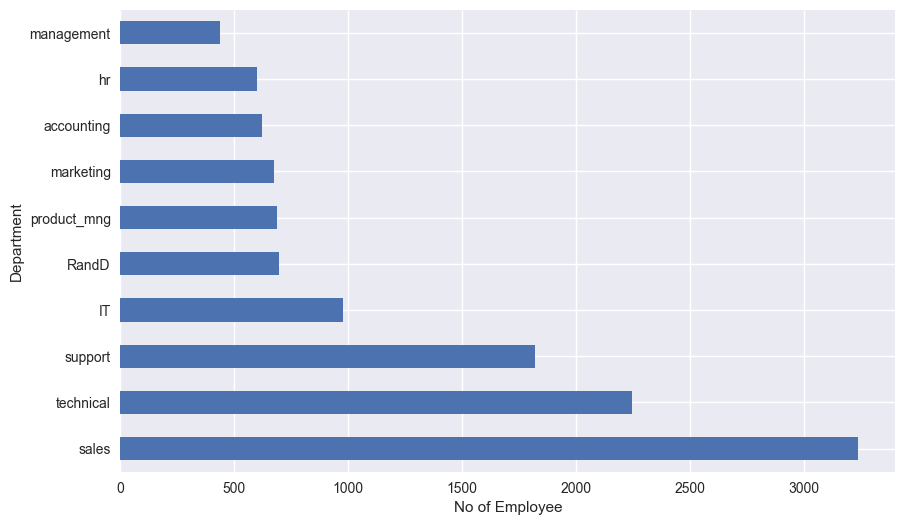

In [191]:
#No of employees in each department
plt.figure(figsize=(10,6))
df['department'].value_counts().sort_values(ascending=False).plot.barh()
plt.ylabel('Department')
plt.xlabel('No of Employee')
plt.show()

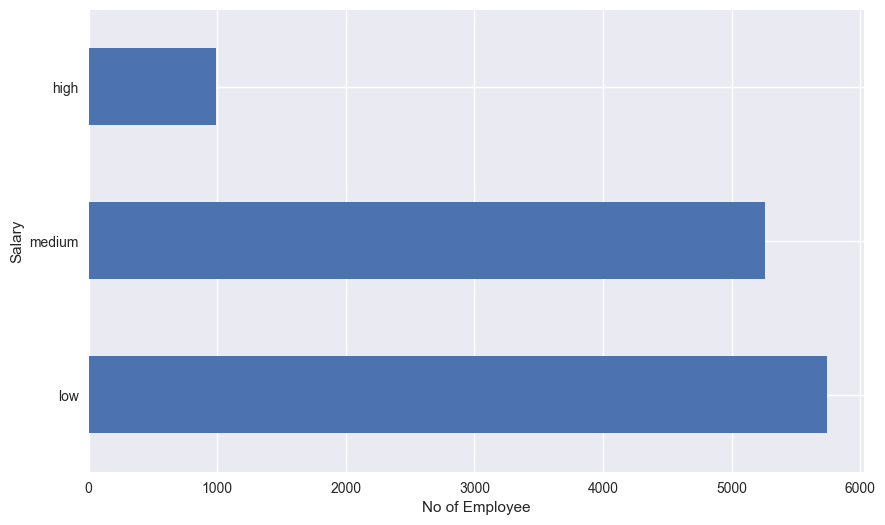

In [193]:
#Total promotion in each department
salary=df['salary'].value_counts().sort_values(ascending=False)

#plotting bar chart
plt.figure(figsize=(10,6))
salary.plot.barh()
plt.ylabel('Salary')
plt.xlabel('No of Employee')
plt.show()


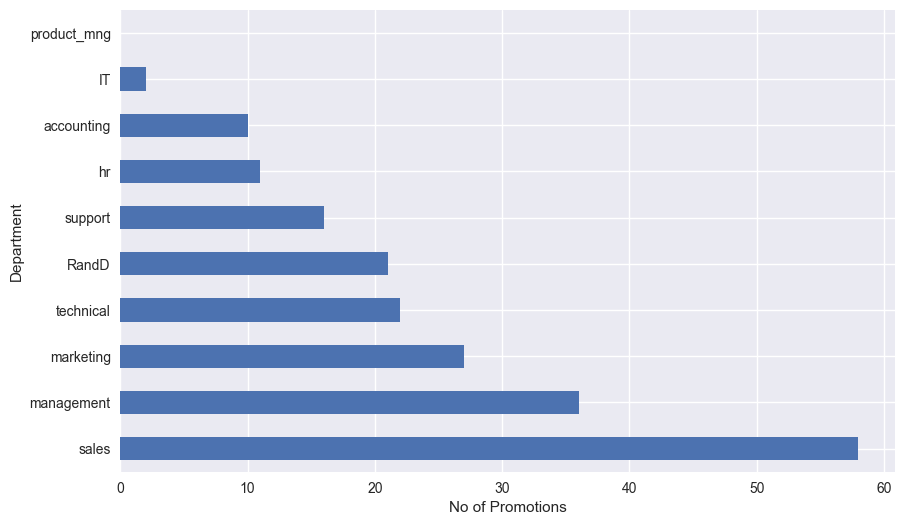

In [153]:
#Total promotion in each department
department_promotion=df.groupby('department')['promotion_last_5years'].sum().sort_values(ascending=True)

#plotting bar chart
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8')
department_promotion.plot.barh()
plt.ylabel('Department')
plt.xlabel('No of Promotions')
plt.gca().invert_yaxis()
plt.show()


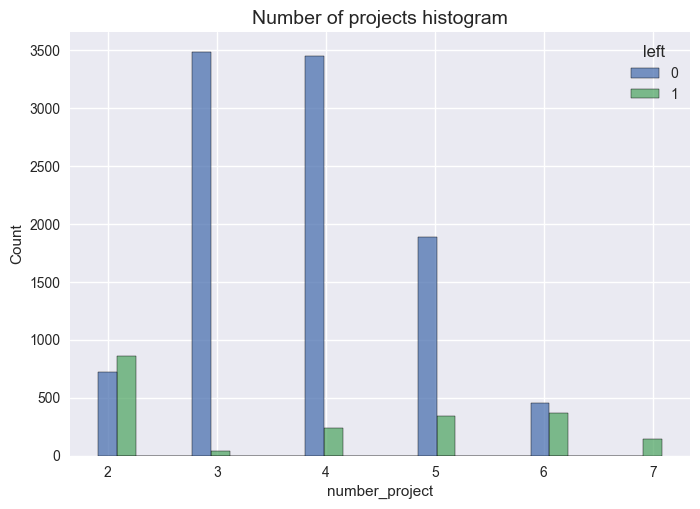

In [260]:
#tenure_stay = df[df['left']==0]['number_project']
#tenure_left = df[df['left']==1]['number_project']
sns.histplot(data=df, x='number_project',hue='left',multiple='dodge', shrink=2)
plt.title('Number of projects histogram', fontsize='14')


# Display the plots
plt.show()

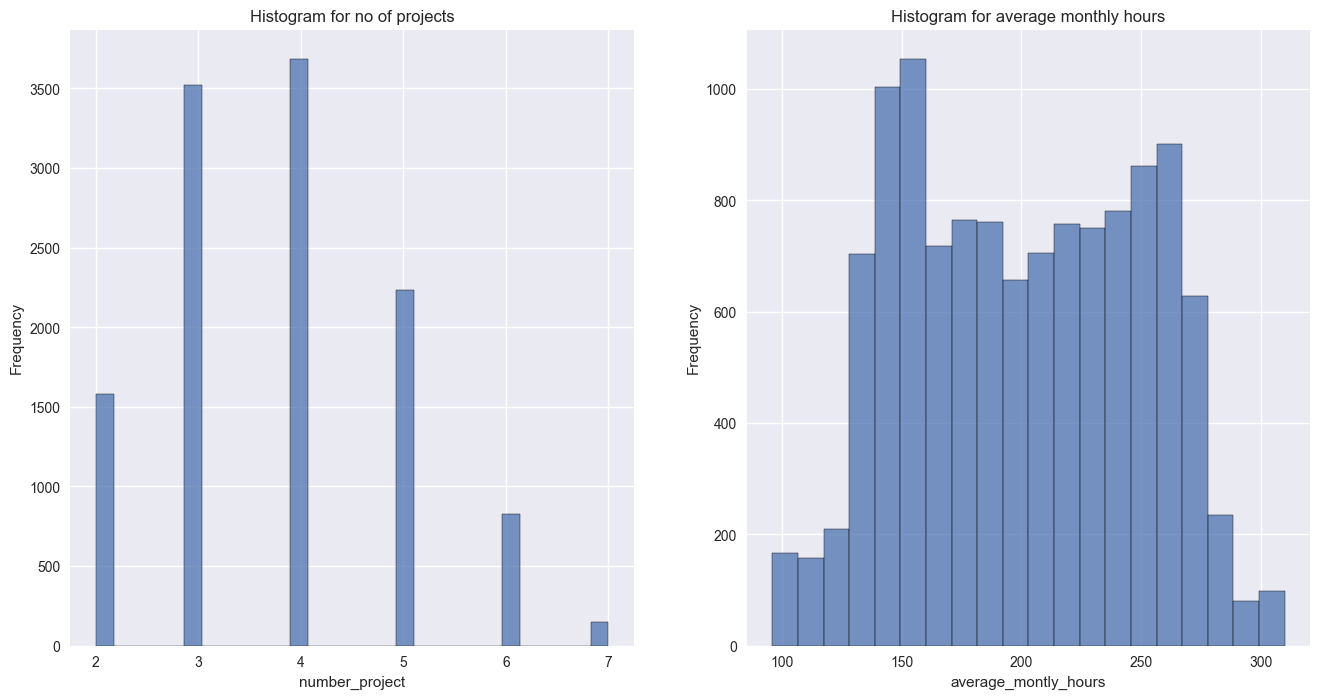

In [271]:
#Creating histogram of no of projects
fig,ax=plt.subplots(1,2,figsize=(16,8))
sns.histplot(data=df,x='number_project',ax=ax[0])
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram for no of projects')

#Creating histogram of average_montly_hours
sns.histplot(df['average_montly_hours'],bins=20,ax=ax[1])
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram for average monthly hours')

plt.show()


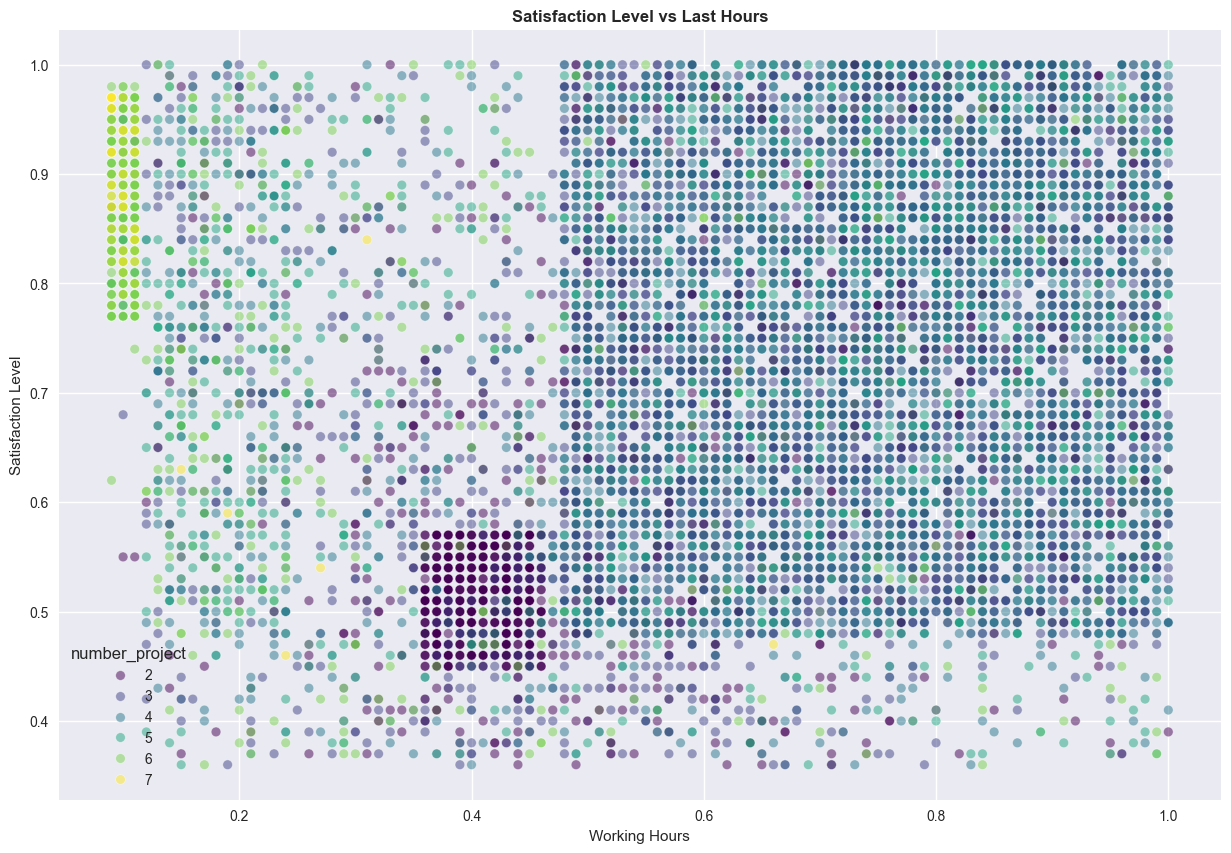

In [285]:
#Scatter plot for average working hours vs satisfaction level
plt.figure(figsize=(15,10))
sns.scatterplot(x='satisfaction_level',
                y='last_evaluation',
                data=df,
                palette='viridis',
                hue='number_project',
                alpha=0.5)
plt.title('Satisfaction Level vs Last Hours',fontweight='bold',fontsize=12)
plt.ylabel('Satisfaction Level')
plt.xlabel('Working Hours')
plt.show()

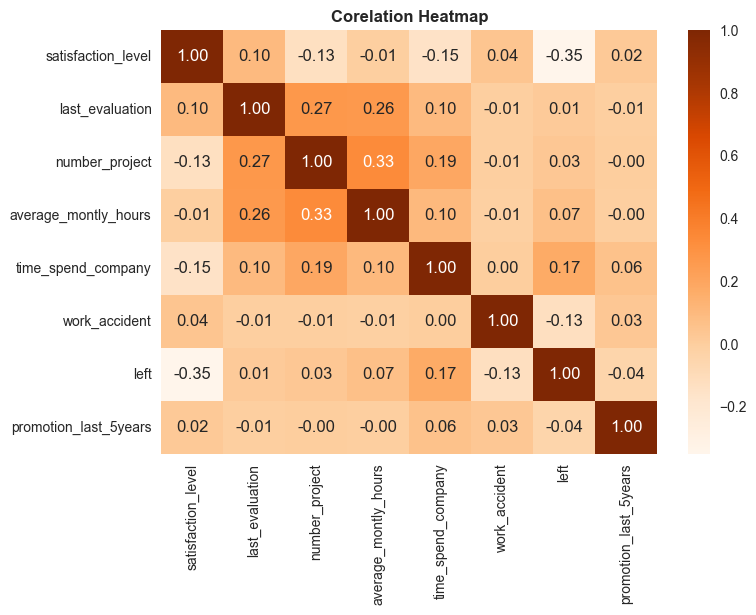

In [288]:
#Calculating corelation of all numerical variables
corelation=df.corr(numeric_only=True)

#plotting corelation into a heatmap
sns.heatmap(data=corelation,annot=True,fmt=".2f",cmap='Oranges')
plt.title('Corelation Heatmap',fontweight='bold')
plt.show()

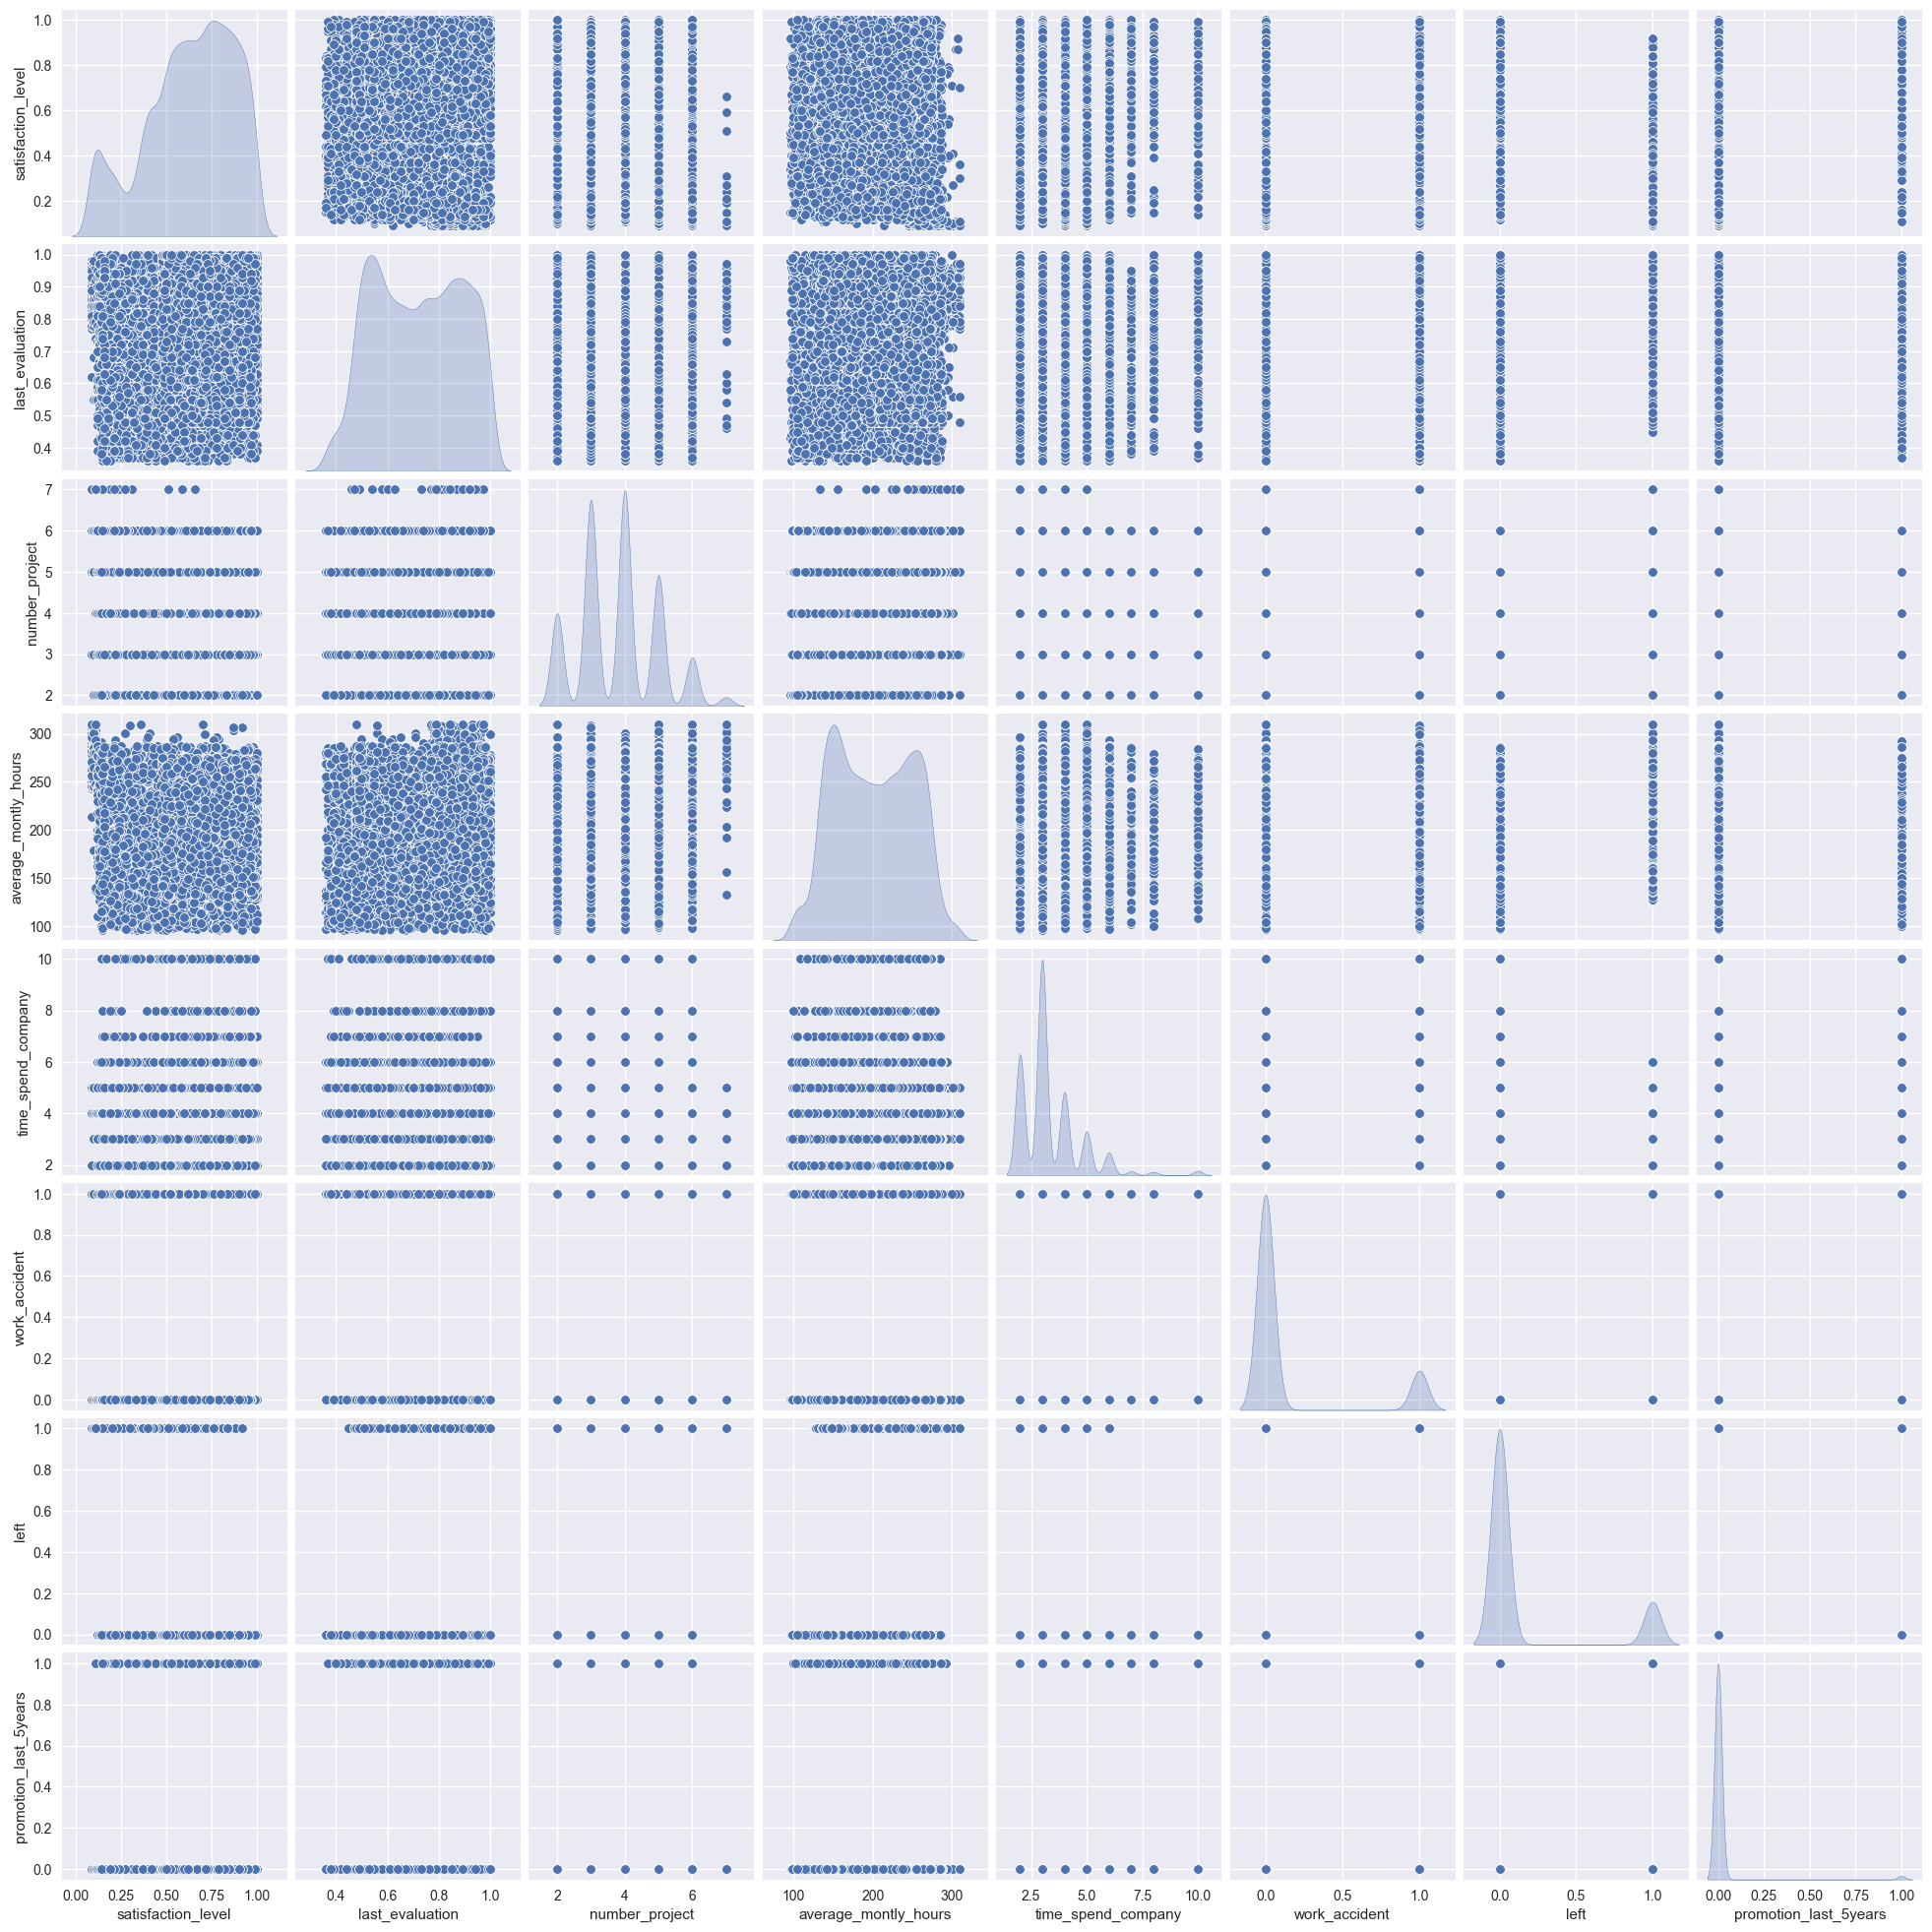

In [290]:
#Scatter plots for relationsships between numerical variable
sns.pairplot(df[numerical_columns],diag_kind='kde')
plt.show()